Contenido bajo licencia Creative Commons BY 4.0 y código bajo licencia MIT. © Manuela Bastidas Olivares y Nicolás Guarín-Zapata 2024.

# Método de colocación

## Problema a resolver

Consideremos la siguiente ecuación diferencial

$$\frac{d^2u}{dx^2} = -4 \pi^2 \sin(2 \pi x) \, , $$

con condiciones de frontera $u(0)=u(1)=0$.

La solución a este problema de valores de la frontera es

$$u_e(x) = \sin (2 \pi x)\, .$$

## Aproximación propuesta

Propongamos una aproximación a la solución de la siguiente forma

$$u_N(x) = \sum_{i=0}^N c_i \phi_i(x) = x (1-x) \sum_{i=0}^N c_i x^i\, ,$$

en donde vemos que esta función satisface las condiciones de frontera.

Y el residual estaría dado por

$$R = \frac{d^2 u_N}{dx^2} + x\, .$$

## Método de colocación

El método de colocación consiste en forzar que el residual sea cero en un conjunto de puntos.
Este método se puede escribir como un método de residuos ponderados si se elige
como función de ponderación el delta de Dirac, es decir,

$$\int\limits_0^1 R w_i(x)\, \mathrm{d}x = 0\quad \forall w_i\, ,$$

con $w_i(x) = \delta(x - x_i)$. O, equivalentemente,

$$R (x_i) = 0\quad \forall x_i\, .$$

La motivación detrás de esto es que si la función debe hacerse 0 en varios puntos, se
acerca a 0 a medida que le número de puntos de colocación aumente.

## Funciones auxiliares

In [1]:
# Esto permite tener gráficos interactivos en
# el caso de correrse en Google Colab
if 'google.colab' in str(get_ipython()):
    %pip install ipympl
    from google.colab import output
    output.enable_custom_widget_manager()

In [2]:
%matplotlib widget

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

In [4]:
if 'google.colab' in str(get_ipython()):
    style = "https://raw.githubusercontent.com/nicoguaro/pinns_mapi-3/main/notebooks/clean.mplstyle"
else:
    style = "./clean.mplstyle"
plt.style.use(style)

In [5]:
init_printing()

In [6]:
x = symbols('x')

In [7]:
u_e = sin(2*pi*x)

In [8]:
def plot_expr(expr, x, rango=(0, 1), ax=None, linestyle="solid"):
    """Grafica expresiones de SymPy que dependen de una variable"""
    expr_num = lambdify(x, expr, "numpy")
    x0 = rango[0]
    x1 = rango[1]
    x_num = np.linspace(0, 1, 301)
    if ax is None:
        plt.figure()
        ax = plt.gca()
    ax.plot(x_num, expr_num(x_num), linestyle=linestyle)

Creemos algunas funciones que nos serán útiles.

In [9]:
def funcion_base(x, k):
    """Elemento k de la base"""
    return x*(1 - x)*x**k


def funcion_aprox(x, num):
    """Función de aproximación
    
    Parametros
    ----------
    num : int
        Número de términos en la expansión.
        
    Devuelve
    -------_
    u_n : expresión de SymPy
        Función de aproximación.
    c : lista
        Lista de coeficientes.
        
    """    
    c = symbols('c0:%d'%num)
    u_n = sum([c[k]*funcion_base(x, k) for k in range(num)])
    return u_n, c


def residual(u, x):
    """Residual para el problema de interés"""
    return diff(u, x, 2) + 4*pi**2*sin(2*pi*x)

Si usamos una función de aproximación con 4 términos tendríamos

In [10]:
nterms = 4

In [11]:
u, c = funcion_aprox(x, nterms)
u

Y el residual sería

In [12]:
res = expand(residual(u, x))
factor(res)

## Solución



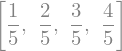

In [13]:
x_colo = [(cont + 1)*S(1)/(nterms + 1) for cont in range(nterms)]
x_colo

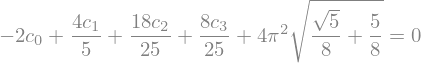

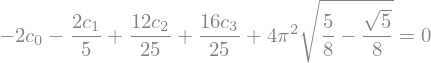

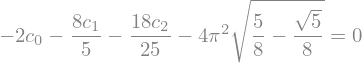

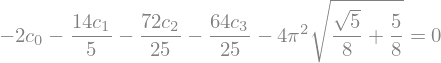

In [14]:
eqs_colo = []
for cont in range(nterms):
    eqs_colo.append(Eq(res.subs(x, x_colo[cont]), 0))
    display(eqs_colo[cont])

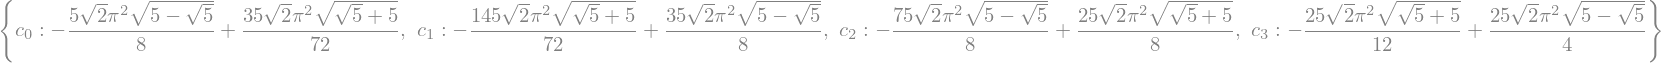

In [15]:
sol_col = solve(eqs_colo, c)
sol_col

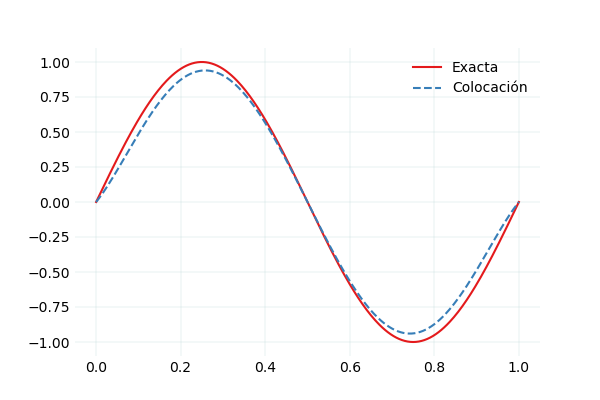

In [16]:
plt.figure()
ax = plt.gca()
plot_expr(u_e, x, ax=ax)
plot_expr(u.subs(sol_col), x, ax=ax, linestyle="dashed")
plt.legend(["Exacta", "Colocación"]);

In [17]:
err_col = integrate((u_e - u.subs(sol_col))**2, (x, 0, 1))/integrate(u_e**2, (x, 0, 1))

In [18]:
N(err_col*100)